<a href="https://colab.research.google.com/github/showpiecep/ML_labs/blob/main/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('iris.data',header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
X = data.iloc[:,:4].to_numpy()
labels = data.iloc[:,4].to_numpy()

In [3]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
y_pred = clf.fit(X_train, y_train).predict(X_test)

print((y_test != y_pred).sum()) #количество наблюдений, который были неправильно определены

3


In [6]:
print(f'Точность классификации {clf.fit(X_train, y_train).score(X_test, y_test) * 100}%')

Точность классификации 96.0%


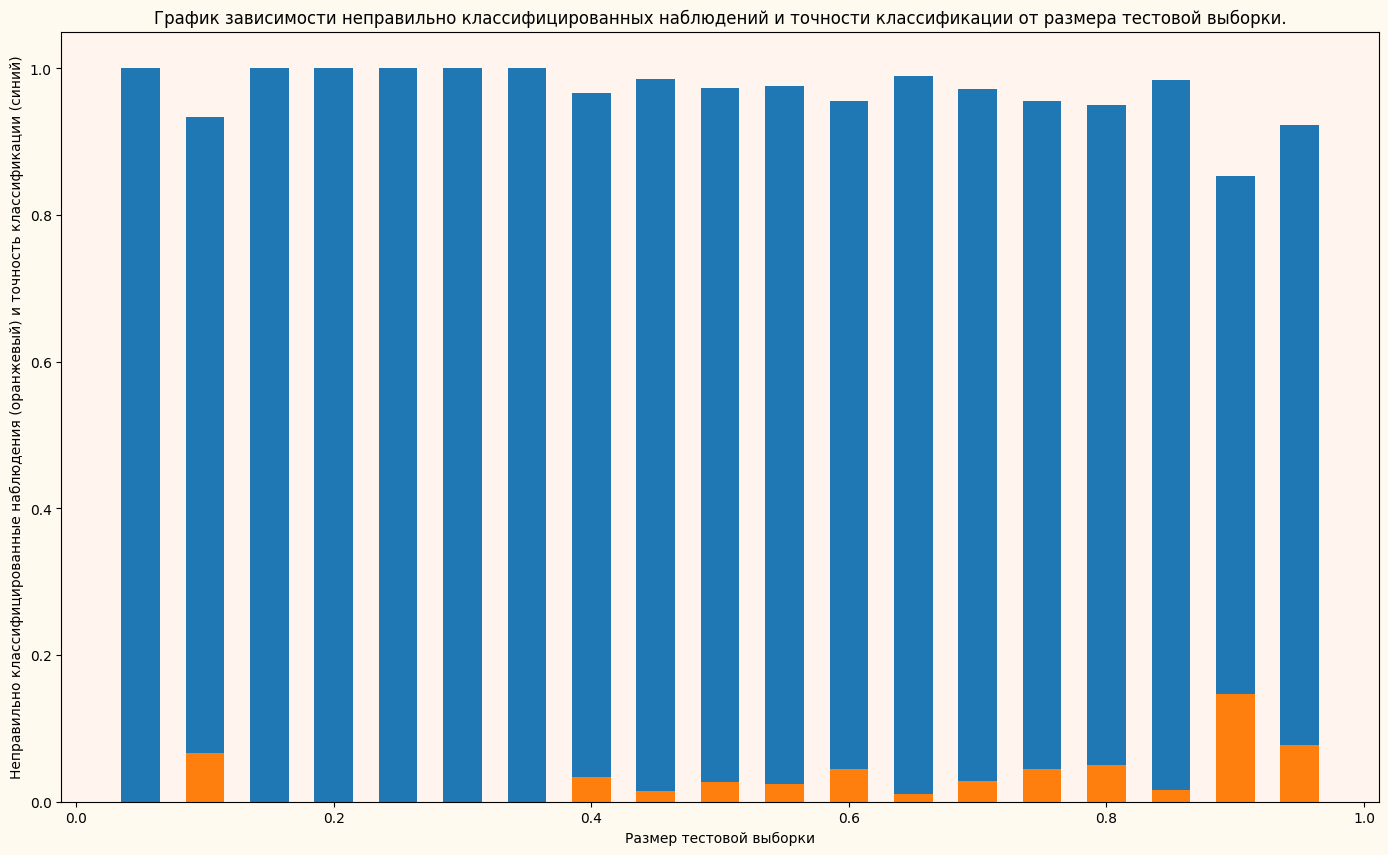

In [7]:
import matplotlib.pyplot as plt

size = 0
list_test_size = []
percentage_misclassified_observations = []
classification_accuracy = []

while size <= 0.95:
    size += 0.05

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size)
    gnb = LinearDiscriminantAnalysis()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    list_test_size.append(size)
    percentage_misclassified_observations.append(np.count_nonzero(y_test != y_pred) / len(y_pred))
    classification_accuracy.append(gnb.fit(X_train, y_train).score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17, 10))

ax.bar(list_test_size, classification_accuracy, width=0.03)
ax.bar(list_test_size, percentage_misclassified_observations, width=0.03)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')

plt.xlabel('Размер тестовой выборки')
plt.ylabel('Неправильно классифицированные наблюдения (оранжевый) и точность классификации (синий)')
plt.title(
    label='График зависимости неправильно классифицированных наблюдений и точности классификации от размера тестовой выборки.',
    fontweight=12)

plt.show()

Используя функцию transform

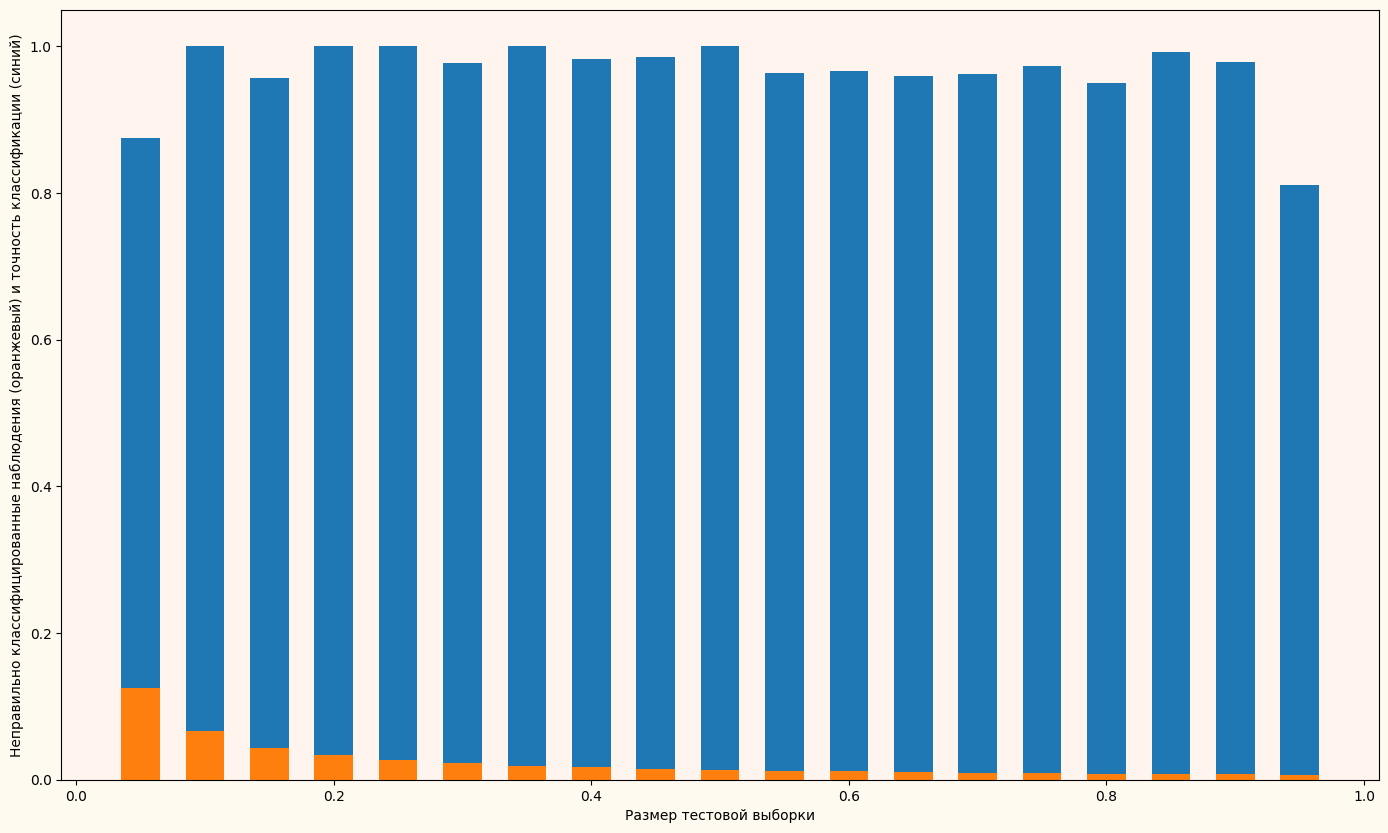

In [8]:
import warnings
import sys
import os

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

size = 0
list_test_size = []
percentage_misclassified_observations = []
classification_accuracy = []

while size <= 0.95:
    size += 0.05

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size)
    gnb = LinearDiscriminantAnalysis()
    y_pred = gnb.fit(X_train, y_train).transform(X_test)

    list_test_size.append(size)
    percentage_misclassified_observations.append(np.count_nonzero(y_test != y_pred) / len(y_pred))
    classification_accuracy.append(gnb.fit(X_train, y_train).score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17, 10))

ax.bar(list_test_size, classification_accuracy, width=0.03)
ax.bar(list_test_size, percentage_misclassified_observations, width=0.03)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')

plt.xlabel('Размер тестовой выборки')
plt.ylabel('Неправильно классифицированные наблюдения (оранжевый) и точность классификации (синий)')

plt.show()

In [9]:
from random import uniform

solver_parameters = ('svd', 'lsqr', 'eigen')

for parameter in solver_parameters:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
    if parameter != 'svd':
        rand_shrinkage = uniform(0.05, 1)
        gnb = LinearDiscriminantAnalysis(solver=parameter, shrinkage=rand_shrinkage)
        y_pred = gnb.fit(X_train, y_train).predict(X_test)
        print(
            f'solver: {parameter}, shrinkage: {rand_shrinkage} - количество параметров которые неправильно были определены: {np.count_nonzero(y_test != y_pred)}')
    else:
        gnb = LinearDiscriminantAnalysis(solver=parameter)
        y_pred = gnb.fit(X_train, y_train).predict(X_test)
        print(f'solver: {parameter}, количество параметров которые неправильно были определены: {np.count_nonzero(y_test != y_pred)}')

solver: svd, количество параметров которые неправильно были определены: 1
solver: lsqr, shrinkage: 0.5847195182032169 - количество параметров которые неправильно были определены: 2
solver: eigen, shrinkage: 0.0854978583517862 - количество параметров которые неправильно были определены: 1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
gnb = LinearDiscriminantAnalysis(priors=[0.7, 0.15, 0.15])
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(np.count_nonzero(y_test != y_pred))
print(f'Точность классификации {clf.fit(X_train, y_train).score(X_test, y_test) * 100}%')

1
Точность классификации 98.66666666666667%


In [11]:
from sklearn import svm

clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(np.count_nonzero(y_test != y_pred))
print(clf.score(X, Y))

4
0.9533333333333334


In [12]:
print(clf.fit(X_train, y_train).score(X_test, y_test))

0.9466666666666667


In [13]:
print(clf.support_vectors_)
print(clf.support_)
print(clf.n_support_)

[[5.1 3.3 1.7 0.5]
 [5.1 3.8 1.9 0.4]
 [5.4 3.9 1.7 0.4]
 [5.  3.  1.6 0.2]
 [6.3 3.3 4.7 1.6]
 [6.3 2.3 4.4 1.3]
 [6.4 2.9 4.3 1.3]
 [6.5 2.8 4.6 1.5]
 [5.8 2.7 4.1 1. ]
 [6.6 3.  4.4 1.4]
 [6.2 2.2 4.5 1.5]
 [5.9 3.2 4.8 1.8]
 [5.4 3.  4.5 1.5]
 [5.5 2.6 4.4 1.2]
 [5.8 2.7 3.9 1.2]
 [6.  3.4 4.5 1.6]
 [5.1 2.5 3.  1.1]
 [5.9 3.  4.2 1.5]
 [6.6 2.9 4.6 1.3]
 [6.7 3.  5.  1.7]
 [7.  3.2 4.7 1.4]
 [5.6 3.  4.1 1.3]
 [6.  2.9 4.5 1.5]
 [6.9 3.1 5.4 2.1]
 [5.6 2.8 4.9 2. ]
 [6.5 3.  5.2 2. ]
 [6.1 2.6 5.6 1.4]
 [6.1 3.  4.9 1.8]
 [7.9 3.8 6.4 2. ]
 [7.2 3.  5.8 1.6]
 [6.7 2.5 5.8 1.8]
 [5.8 2.8 5.1 2.4]
 [6.3 2.8 5.1 1.5]
 [5.8 2.7 5.1 1.9]
 [6.9 3.1 5.1 2.3]
 [5.8 2.7 5.1 1.9]
 [6.  3.  4.8 1.8]
 [6.3 2.7 4.9 1.8]
 [6.8 3.  5.5 2.1]]
[27 30 39 73  6 11 15 21 22 28 34 35 40 41 43 53 54 55 56 57 65 69 72  2
  9 12 13 17 24 26 33 44 46 47 51 58 59 60 68]
[ 4 19 16]


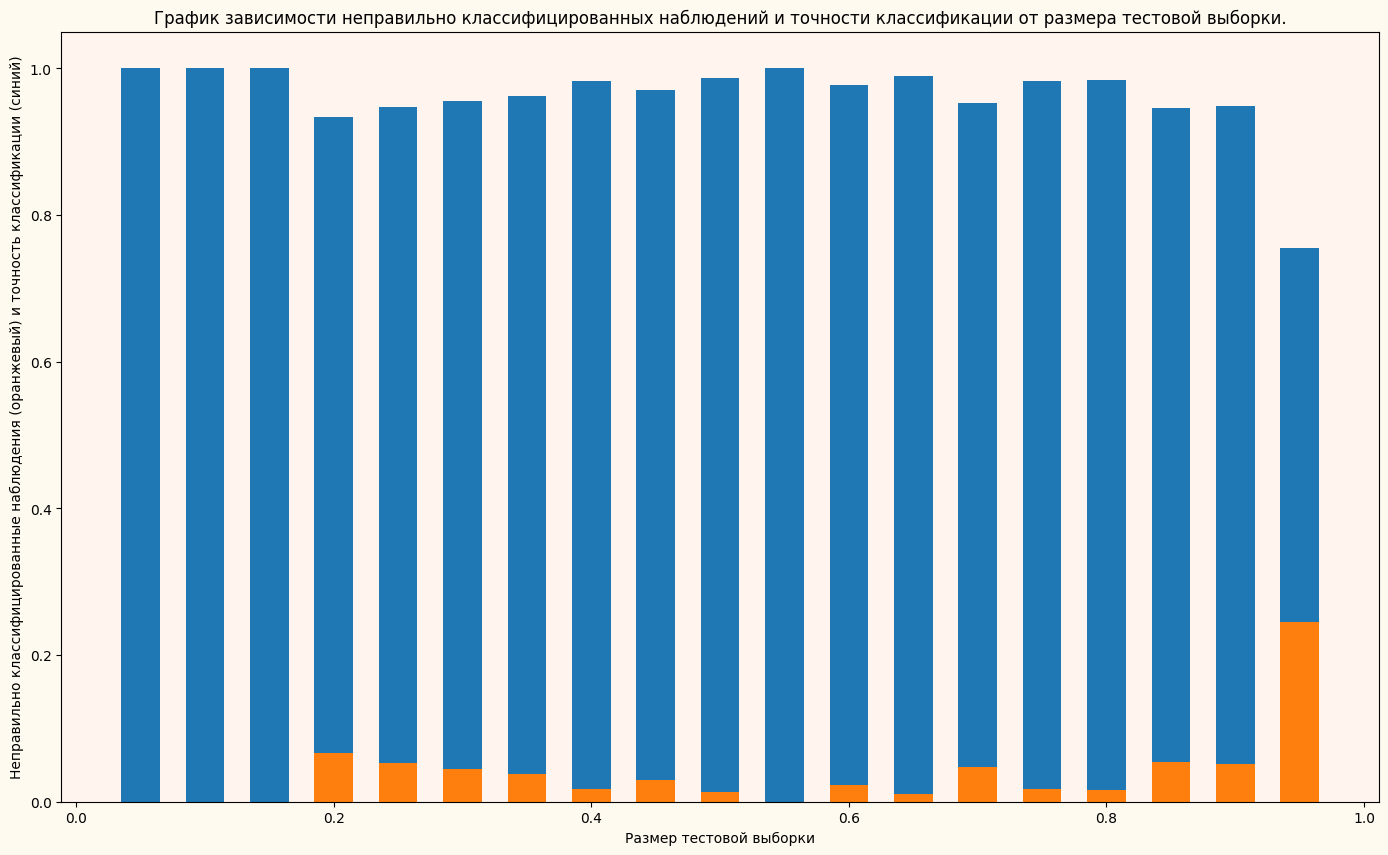

In [14]:
import matplotlib.pyplot as plt

size = 0
list_test_size = []
percentage_misclassified_observations = []
classification_accuracy = []

while size <= 0.95:
    size += 0.05

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size)
    clf = svm.SVC()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    list_test_size.append(size)
    percentage_misclassified_observations.append(np.count_nonzero(y_test != y_pred) / len(y_pred))
    classification_accuracy.append(gnb.fit(X_train, y_train).score(X_test, y_test))

fig, ax = plt.subplots(figsize=(17, 10))

ax.bar(list_test_size, classification_accuracy, width=0.03)
ax.bar(list_test_size, percentage_misclassified_observations, width=0.03)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')

plt.xlabel('Размер тестовой выборки')
plt.ylabel('Неправильно классифицированные наблюдения (оранжевый) и точность классификации (синий)')
plt.title(
    label='График зависимости неправильно классифицированных наблюдений и точности классификации от размера тестовой выборки.',
    fontweight=12)

plt.show()

In [15]:
from random import randint

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)

kernel_parameters = ('linear', 'poly', 'rbf', 'sigmoid')

for parameter in kernel_parameters:
    degree_rand = randint(2, 5)
    max_iter_random = randint(2, 5)

    clf = svm.SVC(kernel=parameter, degree=degree_rand, max_iter=max_iter_random)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print(f'''При kernel={parameter}, degree={degree_rand}, max_iter={max_iter_random}, неправильно классифицированные данные: {np.count_nonzero(y_test != y_pred)}, точность классификации: {clf.score(X, Y)}, векторы поддержки: {clf.support_vectors_}, индексы опорных векторов: {clf.support_}, количество опорных векторов для каждого класса: {clf.n_support_}''')


При kernel=linear, degree=2, max_iter=2, неправильно классифицированные данные: 0, точность классификации: 0.9666666666666667, векторы поддержки: [[5.1 3.3 1.7 0.5]
 [5.1 3.8 1.9 0.4]
 [6.7 3.  5.  1.7]
 [5.1 2.5 3.  1.1]
 [5.9 3.  4.2 1.5]
 [6.5 3.2 5.1 2. ]
 [4.9 2.5 4.5 1.7]
 [6.  3.  4.8 1.8]], индексы опорных векторов: [126 129  36  48 138  41  84  89], количество опорных векторов для каждого класса: [2 3 3]
При kernel=poly, degree=5, max_iter=4, неправильно классифицированные данные: 2, точность классификации: 0.8666666666666667, векторы поддержки: [[5.7 3.8 1.7 0.3]
 [4.5 2.3 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [6.  2.7 5.1 1.6]
 [6.7 3.  5.  1.7]
 [5.1 2.5 3.  1.1]
 [5.  2.  3.5 1. ]
 [5.9 3.  4.2 1.5]
 [5.6 2.8 4.9 2. ]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.2 2.8 4.8 1.8]], индексы опорных векторов: [ 63  79 129   3  36  48 102 138   5  74  84 104], количество опорных векторов для каждого класса: [3 5 4]
При kernel=rbf, degree=4, max_iter=5, неправильно классифицированные данные:

Аналогичен SVC, но использует параметр для управления количеством опорных векторов.

In [16]:
clf = svm.NuSVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(f'Неправильно классифицированные данные: {np.count_nonzero(y_test != y_pred)} точность классификации: {clf.score(X, Y)}, векторы поддержки: {clf.support_vectors_}, индексы опорных векторов: {clf.support_}, количество опорных векторов для каждого класса: {clf.n_support_}')

Неправильно классифицированные данные: 0 точность классификации: 0.98, векторы поддержки: [[4.8 3.4 1.9 0.2]
 [5.5 4.2 1.4 0.2]
 [4.8 3.1 1.6 0.2]
 [4.7 3.2 1.6 0.2]
 [4.4 2.9 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [5.3 3.7 1.5 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.  1.6 0.2]
 [4.6 3.1 1.5 0.2]
 [5.2 3.5 1.5 0.2]
 [5.  3.4 1.6 0.4]
 [5.1 3.4 1.5 0.2]
 [5.7 3.8 1.7 0.3]
 [4.9 3.1 1.5 0.1]
 [4.8 3.  1.4 0.3]
 [4.9 3.1 1.5 0.1]
 [4.8 3.4 1.6 0.2]
 [5.7 4.4 1.5 0.4]
 [4.5 2.3 1.3 0.3]
 [5.1 3.7 1.5 0.4]
 [5.  3.5 1.6 0.6]
 [5.8 4.  1.2 0.2]
 [5.4 3.4 1.7 0.2]
 [4.9 3.  1.4 0.2]
 [5.4 3.7 1.5 0.2]
 [5.1 3.3 1.7 0.5]
 [5.1 3.8 1.9 0.4]
 [5.1 3.8 1.6 0.2]
 [6.  2.2 4.  1. ]
 [6.  2.7 5.1 1.6]
 [6.1 3.  4.6 1.4]
 [6.1 2.8 4.  1.3]
 [6.8 2.8 4.8 1.4]
 [5.9 3.2 4.8 1.8]
 [5.5 2.6 4.4 1.2]
 [5.7 2.8 4.5 1.3]
 [4.9 2.4 3.3 1. ]
 [5.4 3.  4.5 1.5]
 [5.6 2.9 3.6 1.3]
 [6.7 3.  5.  1.7]
 [5.7 2.9 4.2 1.3]
 [5.8 2.6 4.  1.2]
 [5.1 2.5 3.  1.1]
 [5.5 2.4 3.8 1.1]
 [5.6 3.  4.5 1.5]
 [6.6 3.  4.4 1.4]
 [5.7 2.6 3.5 1. 

Аналогичен SVC с параметром kernel='linear', но реализован в терминах liblinear, а не libsvm, поэтому обладает большей гибкостью в выборе штрафов и функций потерь и должен лучше масштабироваться на большое количество выборок. Этот класс поддерживает как плотные, так и разреженные входные данные, а поддержка нескольких классов осуществляется по схеме 'один против остальных'.


In [17]:
clf = svm.LinearSVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(f'Неправильно классифицированные данные: {np.count_nonzero(y_test != y_pred)} точность классификации: {clf.score(X, Y)}')

Неправильно классифицированные данные: 0 точность классификации: 0.9666666666666667
